# Project 3: Dynamic Programming

Har Jing Daryl

Goh Teng Wei

Koh Jun Kai

# (1) Recursive definition of the function P(C)

In [1]:
def knapsack_recursive(C:int , n:int, weight: list, profit: list) -> int:
    index = n-1
    
    # If the max weight is 0 or we have run out of objects to pick, return 0
    if (C == 0 or n == 0):
        return 0
    
    # If the weight of the current object is more than maximum weight allowed, we cannot pick it,
    # so we move on to the next element.
    if weight[index] > C:
        return knapsack_recursive(C, index, weight, profit)
    
    else:
        # Compare and return the max profit between the two max 
        return max(
               # Compare the max profit between not picking an object, 
               max(knapsack_recursive(C,index,weight,profit), 
                   # and picking an object and moving to the next object
                   profit[index] + knapsack_recursive(C-weight[index],index,weight,profit)),
            
               # Compare the max profit between picking an object and moving to the next object 
               max(profit[index] + knapsack_recursive(C-weight[index],index,weight,profit), 
                   # and picking an object and staying on the same object
                   profit[index] + knapsack_recursive(C - weight[index], index+1,weight,profit)))

# (2) Draw the subproblem graph for P(14) where n is 3 with the weights and profits given below

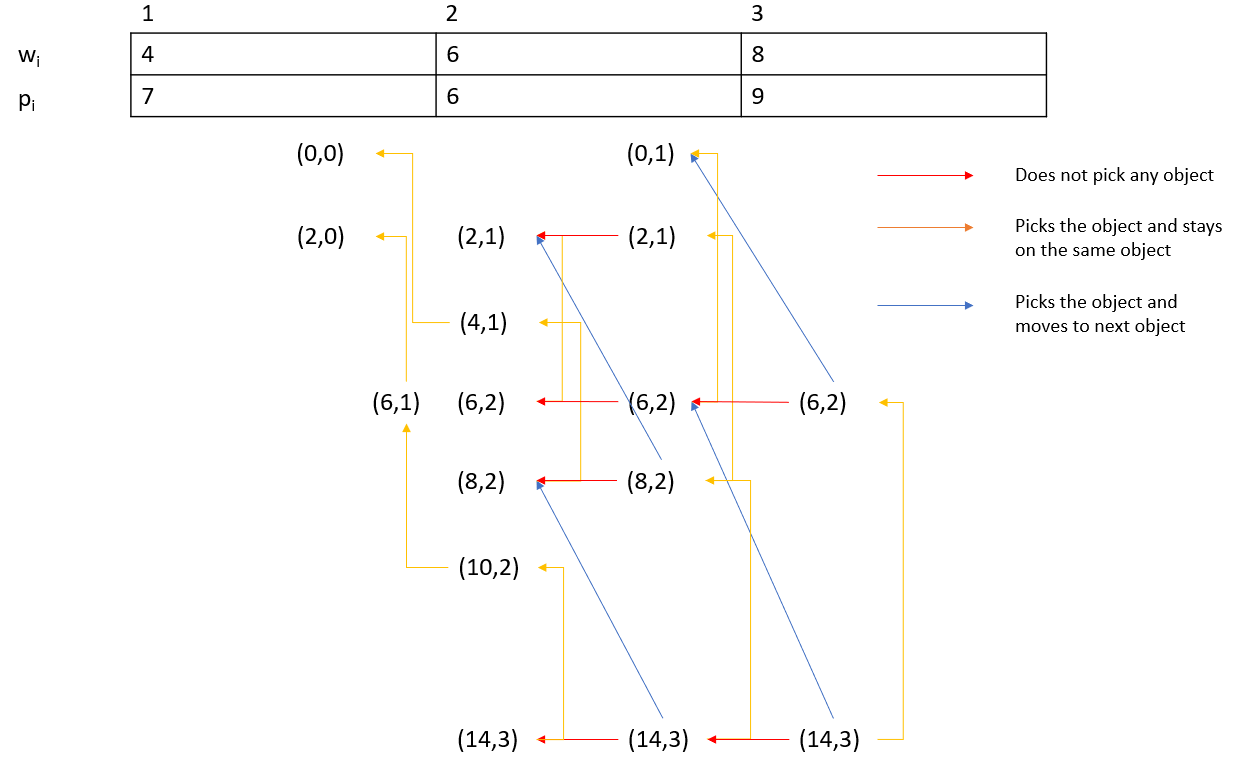

# (3) Give a dynamic programming algorithm to compute the maximum profit, given a knapsack of capacity C, n types of objects with weights w<sub>i</sub> and profits p<sub>i</sub> using the bottom up approach.

In [28]:
def knapsack_dynamic(C: int, n: int, weight: list, profit: list) -> int:
    
    # Creates a list containing C+1 lists, each of n+1 items, all set to 0
    # Initialise 2D array of dimensions (C+1 , n+1) to keep track of max profit 
    matrix = [[0 for x in range(n+1)] for y in range(C+1)] 
    
    # Initialise first column to 0
    for r in range (1, C+1):
        matrix[r][0] = 0
    
    # Initialise first row to 0
    for c in range(n+1):
        matrix[0][c] = 0
    
    # r represents the capacity available
    for r in range(1, C+1):
        # c represents the index of the current object
        for c in range(1, n+1):
            
            # Index of weight and profit arrays 
            index = c-1
            
            # Default value of matrix[r][c] is to the left of it (ie minus 1 column)
            matrix[r][c] = matrix[r][c-1]
            
            # If weight of current object is less than the available capacity, 
            # then we can choose whether we want to pick the current object
            if (weight[index] <= r):
                # If profit of not picking an object is less than profit of picking an object and move to next/pick and stay
                if (matrix[r][c] < max(matrix[r-weight[index]][c-1] + profit[index] , 
                                            matrix[r-weight[index]][c] + profit[index])):
                    # Compare the max profit between picking an object and moving to the next object, 
                    # and picking an object and staying on the same object 
                    matrix[r][c] = max(matrix[r-weight[index]][c-1] + profit[index] , 
                                            matrix[r-weight[index]][c] + profit[index])
                    
   # Printing out matrix values                
    for i in range(C+1):
        print()
        print(i, end=" : ")
        for j in range(n+1):
            print(str(matrix[i][j]),end=" | ")
    print()

    # Returns the bottom left of matrix for max profit 
    return matrix[C][n]

# (4) a. show the running result of P(14) with weights and profits given in (2)

In [29]:
weight1 = [4,6,8];
profit = [7,6,9];
weight2 = [5,6,8];

In [30]:
print("The weights for the objects are: ")
print(weight1)

print("The profits for the objects are:")
print(profit)

print("The maximum profit for recursive programming is: " + str(knapsack_recursive(14,len(profit),weight1,profit)));
print("The maximum profit for dynamic programming is: " + str(knapsack_dynamic(14,len(profit),weight1,profit)));

The weights for the objects are: 
[4, 6, 8]
The profits for the objects are:
[7, 6, 9]
The maximum profit for recursive programming is: 21

0 : 0 | 0 | 0 | 0 | 
1 : 0 | 0 | 0 | 0 | 
2 : 0 | 0 | 0 | 0 | 
3 : 0 | 0 | 0 | 0 | 
4 : 0 | 7 | 7 | 7 | 
5 : 0 | 7 | 7 | 7 | 
6 : 0 | 7 | 7 | 7 | 
7 : 0 | 7 | 7 | 7 | 
8 : 0 | 14 | 14 | 14 | 
9 : 0 | 14 | 14 | 14 | 
10 : 0 | 14 | 14 | 14 | 
11 : 0 | 14 | 14 | 14 | 
12 : 0 | 21 | 21 | 21 | 
13 : 0 | 21 | 21 | 21 | 
14 : 0 | 21 | 21 | 21 | 
The maximum profit for dynamic programming is: 21


# (4) b. Show the running result of P(14) with weights and profits given below.

In [31]:
print("The weights for the objects are: ")
print(weight2)

print("The profits for the objects are:")
print(profit)

print("The maximum profit for recursive programming is: " + str(knapsack_recursive(14,len(profit),weight2,profit)));
print("The maximum profit for dynamic programming is: " + str(knapsack_dynamic(14,len(profit),weight2,profit)));

The weights for the objects are: 
[5, 6, 8]
The profits for the objects are:
[7, 6, 9]
The maximum profit for recursive programming is: 16

0 : 0 | 0 | 0 | 0 | 
1 : 0 | 0 | 0 | 0 | 
2 : 0 | 0 | 0 | 0 | 
3 : 0 | 0 | 0 | 0 | 
4 : 0 | 0 | 0 | 0 | 
5 : 0 | 7 | 7 | 7 | 
6 : 0 | 7 | 7 | 7 | 
7 : 0 | 7 | 7 | 7 | 
8 : 0 | 7 | 7 | 9 | 
9 : 0 | 7 | 7 | 9 | 
10 : 0 | 14 | 14 | 14 | 
11 : 0 | 14 | 14 | 14 | 
12 : 0 | 14 | 14 | 14 | 
13 : 0 | 14 | 14 | 16 | 
14 : 0 | 14 | 14 | 16 | 
The maximum profit for dynamic programming is: 16


### Thank you!
### 谢谢
### 감사합니다